# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [107]:
import pandas as pd

## Regression Model Evaluation

In [108]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [109]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [110]:
#Como se quiere testear un 20% se ajusta de manera entera (0.2)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [111]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [112]:
from sklearn.metrics import r2_score
print(f'El coeficiente de determinacion de y_pred_train es de: {r2_score(y_pred_train, y_train)}')
print(f'El coeficiente de determinacion de y_pred_test es de: {r2_score(y_pred_test, y_test)}')
#El coeficiente supera el 50% por lo que podria ser valido.

El coeficiente de determinacion de y_pred_train es de: 0.6578857839407862
El coeficiente de determinacion de y_pred_test es de: 0.47314419444552847


## 4. Calculate and print mean squared error for both the training and the testing set.

In [113]:
from sklearn.metrics import mean_squared_error
meanC=mean_squared_error(y_pred_train, y_train)
meanC_test=mean_squared_error(y_pred_test, y_test)
print(meanC)
print(meanC_test)

19.441884451769077
33.71450312287925


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [114]:
from sklearn.metrics import mean_absolute_error
absolute=mean_absolute_error(y_pred_train, y_train)
absolute_test=mean_absolute_error(y_pred_test, y_test)
print(absolute)
print(absolute_test)

3.088297533051592
3.83585657583271


## Classification Model Evaluation

In [115]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [117]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

/home/danielgarcia/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/danielgarcia/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [118]:
from sklearn.metrics import accuracy_score
print(f'El accuracy score para la practica es de: {accuracy_score(y_pred_train, y_train)}')
print(f'El accuracy score para el test es de: {accuracy_score(y_pred_test, y_test)}')

El accuracy score para la practica es de: 0.975
El accuracy score para el test es de: 0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [119]:
from sklearn.metrics import balanced_accuracy_score
print(f'El accuracy score balanceado para la practica es de: {balanced_accuracy_score(y_pred_train, y_train)}')
print(f'El accuracy score balanceado para el test es de:{balanced_accuracy_score(y_pred_test, y_test)}')

El accuracy score balanceado para la practica es de: 0.9782608695652174
El accuracy score balanceado para el test es de:0.9722222222222222


## 10. Calculate and print the precision score for both the training and the testing set.

In [120]:
from sklearn.metrics import precision_score
print(f'El precision score  para la practica es de: {precision_score(y_pred_train, y_train, average="weighted")}')
print(f'El precision score  para el test es de:{precision_score(y_pred_test, y_test, average="weighted")}')

El precision score  para la practica es de: 0.9769230769230769
El precision score  para el test es de:0.9714285714285714


## 11. Calculate and print the recall score for both the training and the testing set.

In [121]:
from sklearn.metrics import recall_score
print(f'El recall score para la practica es de: {recall_score(y_pred_train, y_train , average="weighted")}')
print(f'El recall score para el test es de:{recall_score(y_pred_test, y_test , average="weighted")}')

El recall score para la practica es de: 0.975
El recall score para el test es de:0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [122]:
from sklearn.metrics import f1_score
print(f'El recall score para la practica es de: {f1_score(y_pred_train, y_train , average="weighted")}')
print(f'El recall score para el test es de:{f1_score(y_pred_test, y_test , average="weighted")}')

El recall score para la practica es de: 0.9750786516853933
El recall score para el test es de:0.9672240802675586


## 13. Generate confusion matrices for both the training and the testing set.

Text(33.0, 0.5, 'GT')

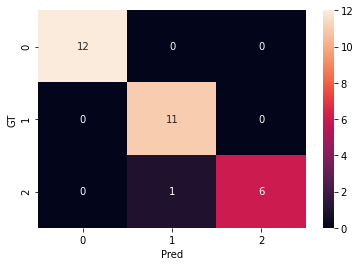

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, y_pred_test),annot=True)
plt.xlabel("Pred")
plt.ylabel("GT")

Text(33.0, 0.5, 'GT')

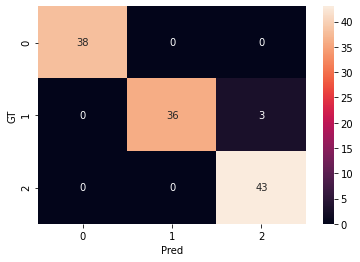

In [124]:
sns.heatmap(confusion_matrix(y_train, y_pred_train),annot=True)
plt.xlabel("Pred")
plt.ylabel("GT")

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.